# Apparent age and gender prediction within OpenCV

This notebook uses pre-trained age and gender model of the following study:

[DEX: Deep EXpectation of apparent age from a single image](https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/)

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Haar cascade for face detection

In [2]:
opencv_home = cv2.__file__
folders = opencv_home.split(os.path.sep)[0:-1]

path = folders[0]
for folder in folders[1:]:
    path = path + "/" + folder

face_detector_path = path+"/data/haarcascade_frontalface_default.xml"

print("haar cascade configuration found here: ",face_detector_path)

if os.path.isfile(face_detector_path) != True:
    raise ValueError("Confirm that opencv is installed on your environment! Expected path ",face_detector_path," violated.")

haar_detector = cv2.CascadeClassifier(face_detector_path)

haar cascade configuration found here:  C:/Users/IS96273/AppData/Roaming/Python/Python35/site-packages/cv2/data/haarcascade_frontalface_default.xml


In [3]:
def detect_faces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = haar_detector.detectMultiScale(gray, 1.3, 5)
    return faces

## Load pre-trained age and gender models

In [4]:
#model structure: https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/age.prototxt
#pre-trained weights: https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/dex_chalearn_iccv2015.caffemodel
age_model = cv2.dnn.readNetFromCaffe("age.prototxt", "dex_chalearn_iccv2015.caffemodel")

In [5]:
#model structure: https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/gender.prototxt
#pre-trained weights: https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/gender.caffemodel
gender_model = cv2.dnn.readNetFromCaffe("gender.prototxt", "gender.caffemodel")

In [21]:
output_indexes = np.array([i for i in range(0, 101)])

def analysis(img_path):
    img = cv2.imread(img_path)
    
    #plt.imshow(img[:, :, ::-1]); plt.axis('off'); plt.show()
    
    #detect face
    
    faces = detect_faces(img)
    
    for face in faces:
        x, y, w, h = face
        
        detected_face = img[int(y):int(y+h), int(x):int(x+w)]
        
        #age model is a regular vgg and it expects (224, 224, 3) shape input
        
        detected_face = cv2.resize(detected_face, (224, 224))
        img_blob = cv2.dnn.blobFromImage(detected_face) #caffe model expects (1, 3, 224, 224) shape input
    
        #---------------------------
        
        age_model.setInput(img_blob)
        age_dist = age_model.forward()[0]
        apparent_predictions = round(np.sum(age_dist * output_indexes), 2)
        print("Apparent age: ",apparent_predictions)
        
        #---------------------------
        
        gender_model.setInput(img_blob)
        gender_class = gender_model.forward()[0]
        gender = 'Woman ' if np.argmax(gender_class) == 0 else 'Man'
        print("Gender: ", gender)
        
        #---------------------------
        
        plt.imshow(detected_face[:, :, ::-1]); plt.axis('off')
        plt.show()
        

Apparent age:  16.15
Gender:  Man


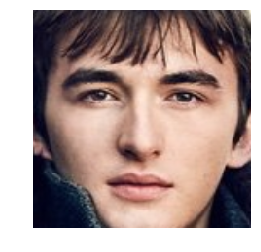

Apparent age:  19.07
Gender:  Woman 


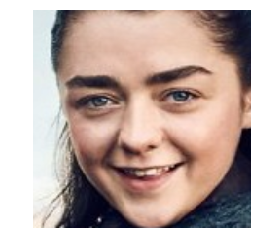

Apparent age:  28.29
Gender:  Woman 


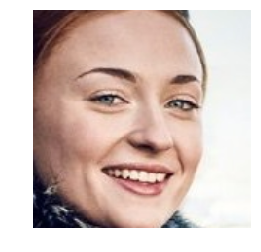

Apparent age:  41.93
Gender:  Man


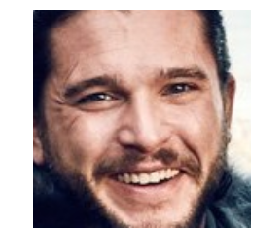

In [22]:
analysis("dataset/stark-family.jpg")

Apparent age:  16.29
Gender:  Woman 


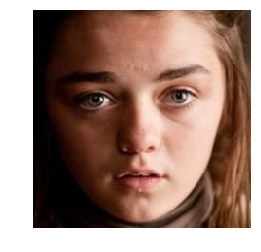

In [23]:
analysis("dataset/arya.jpg")

Apparent age:  18.21
Gender:  Woman 


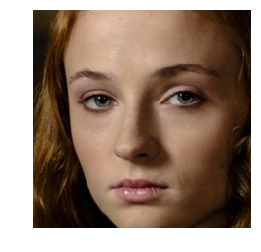

In [24]:
analysis("dataset/sansa.jpg")

Apparent age:  15.37
Gender:  Woman 


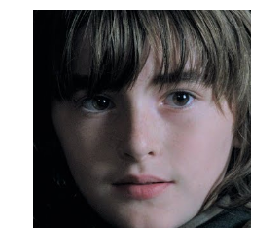

In [25]:
analysis("dataset/bran.jpg")

Apparent age:  14.68
Gender:  Man


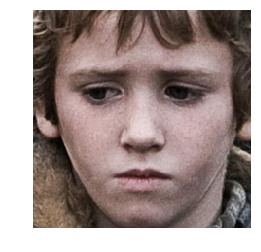

In [26]:
analysis("dataset/rickon.jpg")

Apparent age:  33.08
Gender:  Man


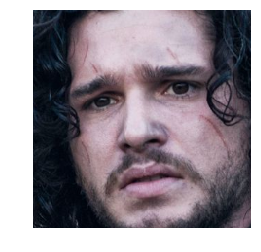

In [27]:
analysis("dataset/jon.jpg")

Apparent age:  26.22
Gender:  Man


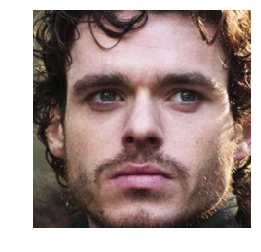

In [28]:
analysis("dataset/rob.jpg")

Apparent age:  49.14
Gender:  Man


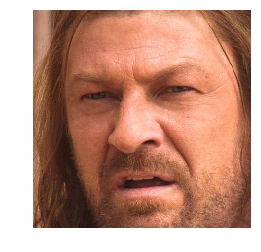

In [29]:
analysis("dataset/eddard.jpg")

Apparent age:  44.67
Gender:  Woman 


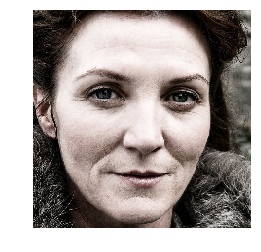

In [30]:
analysis("dataset/catelyn.jpg")